In [122]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from geopy.distance import great_circle  # For calculating distances
import geopandas as gpd
from shapely import wkt
from shapely.wkt import loads

In [123]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv("Los_Angeles.csv")
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,190319651,08/24/2019,08/24/2019,450,3,Southwest,356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,22.0,M,H,101.0,STREET,JEFFERSON BL,NORMANDIE AV,"(34.0255, -118.3002)"
1,190319680,08/30/2019,08/30/2019,2320,3,Southwest,355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,101.0,STREET,JEFFERSON BL,W WESTERN,"(34.0256, -118.3089)"
2,190413769,08/25/2019,08/25/2019,545,4,Hollenbeck,422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,NaN,M,X,101.0,STREET,N BROADWAY,W EASTLAKE AV,"(34.0738, -118.2078)"
3,190127578,11/20/2019,11/20/2019,350,1,Central,128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,21.0,M,H,101.0,STREET,1ST,CENTRAL,"(34.0492, -118.2391)"
4,190319695,08/30/2019,08/30/2019,2100,3,Southwest,374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,49.0,M,B,101.0,STREET,MARTIN LUTHER KING JR,ARLINGTON AV,"(34.0108, -118.3182)"


In [124]:
df = df.convert_dtypes()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599780 entries, 0 to 599779
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   DR Number               599780 non-null  Int64 
 1   Date Reported           599780 non-null  string
 2   Date Occurred           599780 non-null  string
 3   Time Occurred           599780 non-null  Int64 
 4   Area ID                 599780 non-null  Int64 
 5   Area Name               599780 non-null  string
 6   Reporting District      599780 non-null  Int64 
 7   Crime Code              599780 non-null  Int64 
 8   Crime Code Description  599780 non-null  string
 9   MO Codes                512598 non-null  string
 10  Victim Age              513934 non-null  Int64 
 11  Victim Sex              589705 non-null  string
 12  Victim Descent          588762 non-null  string
 13  Premise Code            598821 non-null  Int64 
 14  Premise Description     598820 non-n

In [125]:
import pandas as pd

# Create a DataFrame with the column names and null counts
null_counts = pd.DataFrame({
    'Column': df.columns,
    'Null Count': [df[column].isnull().sum() for column in df.columns]
})

# Calculate the percentage of missing values
null_counts['Percentage Missing'] = null_counts['Null Count'] / df.shape[0] * 100
null_counts['Percentage Missing'] = null_counts['Percentage Missing'].round(2)
print(null_counts)


                    Column  Null Count  Percentage Missing
0                DR Number           0                0.00
1            Date Reported           0                0.00
2            Date Occurred           0                0.00
3            Time Occurred           0                0.00
4                  Area ID           0                0.00
5                Area Name           0                0.00
6       Reporting District           0                0.00
7               Crime Code           0                0.00
8   Crime Code Description           0                0.00
9                 MO Codes       87182               14.54
10              Victim Age       85846               14.31
11              Victim Sex       10075                1.68
12          Victim Descent       11018                1.84
13            Premise Code         959                0.16
14     Premise Description         960                0.16
15                 Address           0                0.

In [126]:
df['Time Occurred'].head()

0     450
1    2320
2     545
3     350
4    2100
Name: Time Occurred, dtype: Int64

In [127]:
df['Victim Age'].unique()

<IntegerArray>
[  22,   30, <NA>,   21,   49,   60,   73,   39,   48,   68,   63,   35,   61,
   37,   55,   62,   72,   41,   76,   40,   38,   18,   24,   54,   52,   28,
   53,   34,   32,   65,   33,   25,   29,   50,   26,   31,   67,   27,   20,
   66,   46,   43,   19,   58,   57,   42,   84,   99,   23,   36,   69,   51,
   88,   90,   44,   17,   47,   77,   16,   64,   56,   59,   86,   45,   75,
   74,   71,   70,   83,   15,   85,   79,   13,   14,   12,   87,   89,   80,
   82,   78,   11,   81,   91,   10,   96,   95,   92,   93,   94,   98,   97]
Length: 91, dtype: Int64

In [128]:
median_age = df['Victim Age'].median()
df['Victim Age'].fillna(math.ceil(median_age), inplace=True)
df['Victim Age'] = df['Victim Age'].astype('Int64')

In [129]:
df['Victim Sex'].unique()

<StringArray>
['M', 'F', 'X', <NA>, 'H', 'N', '-']
Length: 7, dtype: string

In [130]:
# Assuming 'df' is your dataframe
valid_sex_values = ['M', 'F']
df['Victim Sex'] = df['Victim Sex'].apply(lambda x: x if pd.notna(x) and x in valid_sex_values else None)
mode_sex = df['Victim Sex'].mode().iloc[0]
df['Victim Sex'].fillna(mode_sex, inplace=True)


In [131]:
df.dropna(subset=['Premise Code', 'Premise Description'], inplace=True)

In [132]:
df.drop(columns=["Crime Code Description", "Crime Code", "Reporting District", "Victim Descent", "Cross Street"], inplace=True)

In [133]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598820 entries, 0 to 599779
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DR Number            598820 non-null  Int64 
 1   Date Reported        598820 non-null  string
 2   Date Occurred        598820 non-null  string
 3   Time Occurred        598820 non-null  Int64 
 4   Area ID              598820 non-null  Int64 
 5   Area Name            598820 non-null  string
 6   MO Codes             511690 non-null  string
 7   Victim Age           598820 non-null  Int64 
 8   Victim Sex           598820 non-null  string
 9   Premise Code         598820 non-null  Int64 
 10  Premise Description  598820 non-null  string
 11  Address              598820 non-null  string
 12  Location             598820 non-null  string
dtypes: Int64(5), string(8)
memory usage: 66.8 MB


In [134]:
df['MO Codes'] = df['MO Codes'].fillna('0605')

In [135]:
def get_severity_and_factors(mo_codes):
    mo_list = mo_codes.split()

    # Severity mapping
    if any(code in mo_list for code in ['3024', '3027']):
        severity = 3
    elif any(code in mo_list for code in ['3025', '3026']):
        severity = 2
    elif '3028' in mo_list:
        severity = 1
    else:
        severity = 1  # Default value
    
    # Factors mapping
    if any(code in mo_list for code in ['3029', '3030', '3038', '3039', '3040']):
        factors = 'Road Rage'
    elif '3201' in mo_list:
        factors = 'Weather/Road'
    else:
        factors = 'Traffic Accident'  # Default value
    
    return severity, factors

# Apply the function to your dataset
df['Severity'], df['Factors'] = zip(*df['MO Codes'].apply(get_severity_and_factors))

In [136]:
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,MO Codes,Victim Age,Victim Sex,Premise Code,Premise Description,Address,Location,Severity,Factors
0,190319651,08/24/2019,08/24/2019,450,3,Southwest,3036 3004 3026 3101 4003,22,M,101,STREET,JEFFERSON BL,"(34.0255, -118.3002)",2,Traffic Accident
1,190319680,08/30/2019,08/30/2019,2320,3,Southwest,3037 3006 3028 3030 3039 3101 4003,30,F,101,STREET,JEFFERSON BL,"(34.0256, -118.3089)",1,Road Rage
2,190413769,08/25/2019,08/25/2019,545,4,Hollenbeck,3101 3401 3701 3006 3030,38,M,101,STREET,N BROADWAY,"(34.0738, -118.2078)",1,Road Rage
3,190127578,11/20/2019,11/20/2019,350,1,Central,0605 3101 3401 3701 3011 3034,21,M,101,STREET,1ST,"(34.0492, -118.2391)",1,Traffic Accident
4,190319695,08/30/2019,08/30/2019,2100,3,Southwest,0605 4025 3037 3004 3025 3101,49,M,101,STREET,MARTIN LUTHER KING JR,"(34.0108, -118.3182)",2,Traffic Accident


In [137]:
df['Factors'].value_counts()


Factors
Traffic Accident    343656
Road Rage           255159
Weather/Road             5
Name: count, dtype: int64

In [138]:
df['Severity'].value_counts()

Severity
1    373509
2    208114
3     17197
Name: count, dtype: int64

In [139]:
df.drop(columns=['MO Codes'], inplace=True)

In [140]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598820 entries, 0 to 599779
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DR Number            598820 non-null  Int64 
 1   Date Reported        598820 non-null  string
 2   Date Occurred        598820 non-null  string
 3   Time Occurred        598820 non-null  Int64 
 4   Area ID              598820 non-null  Int64 
 5   Area Name            598820 non-null  string
 6   Victim Age           598820 non-null  Int64 
 7   Victim Sex           598820 non-null  string
 8   Premise Code         598820 non-null  Int64 
 9   Premise Description  598820 non-null  string
 10  Address              598820 non-null  string
 11  Location             598820 non-null  string
 12  Severity             598820 non-null  Int64 
 13  Factors              598820 non-null  string
dtypes: Int64(6), string(8)
memory usage: 72.0 MB


In [141]:
# Use regular expression to extract latitude and longitude
df[['Latitude', 'Longitude']] = df['Location'].str.extract(r'\(([^,]+),\s*([^)]+)\)')

# Convert the data type of the new columns to numeric
df[['Latitude', 'Longitude']] = df[['Latitude', 'Longitude']].apply(pd.to_numeric)


In [142]:
print(df['Time Occurred'].iloc[218:220])


218    1300
219    1230
Name: Time Occurred, dtype: Int64


In [143]:
df['Date Occurred'] = pd.to_datetime(df['Date Occurred'])
# Convert the 'Time Occurred' column to a time format
df['Time Occurred'] = pd.to_datetime(df['Time Occurred'].astype(str).str.zfill(4), format='%H%M', errors='coerce').dt.time

df['Date Reported'] = pd.to_datetime(df['Date Reported'])


In [144]:
print(type(df['Time Occurred'][0]))


<class 'datetime.time'>


In [145]:
df['Day of Week'] = df['Date Occurred'].dt.day_name()
df['Month'] = df['Date Occurred'].dt.month
df['Year'] = df['Date Occurred'].dt.year

In [146]:
df = df.convert_dtypes()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598820 entries, 0 to 599779
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DR Number            598820 non-null  Int64         
 1   Date Reported        598820 non-null  datetime64[ns]
 2   Date Occurred        598820 non-null  datetime64[ns]
 3   Time Occurred        598820 non-null  object        
 4   Area ID              598820 non-null  Int64         
 5   Area Name            598820 non-null  string        
 6   Victim Age           598820 non-null  Int64         
 7   Victim Sex           598820 non-null  string        
 8   Premise Code         598820 non-null  Int64         
 9   Premise Description  598820 non-null  string        
 10  Address              598820 non-null  string        
 11  Location             598820 non-null  string        
 12  Severity             598820 non-null  Int64         
 13  Factors            

In [147]:
df1 = df.copy()

In [148]:
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Victim Age,Victim Sex,Premise Code,Premise Description,Address,Location,Severity,Factors,Latitude,Longitude,Day of Week,Month,Year
0,190319651,2019-08-24,2019-08-24,04:50:00,3,Southwest,22,M,101,STREET,JEFFERSON BL,"(34.0255, -118.3002)",2,Traffic Accident,34.0255,-118.3002,Saturday,8,2019
1,190319680,2019-08-30,2019-08-30,23:20:00,3,Southwest,30,F,101,STREET,JEFFERSON BL,"(34.0256, -118.3089)",1,Road Rage,34.0256,-118.3089,Friday,8,2019
2,190413769,2019-08-25,2019-08-25,05:45:00,4,Hollenbeck,38,M,101,STREET,N BROADWAY,"(34.0738, -118.2078)",1,Road Rage,34.0738,-118.2078,Sunday,8,2019
3,190127578,2019-11-20,2019-11-20,03:50:00,1,Central,21,M,101,STREET,1ST,"(34.0492, -118.2391)",1,Traffic Accident,34.0492,-118.2391,Wednesday,11,2019
4,190319695,2019-08-30,2019-08-30,21:00:00,3,Southwest,49,M,101,STREET,MARTIN LUTHER KING JR,"(34.0108, -118.3182)",2,Traffic Accident,34.0108,-118.3182,Friday,8,2019


In [149]:
# Get the number of unique values for each column
unique_counts_per_column = df.nunique()

# Display the results for each column
for column_name, unique_count in unique_counts_per_column.items():
    print(f'Column "{column_name}" has {unique_count} unique values.')

Column "DR Number" has 598820 unique values.
Column "Date Reported" has 5063 unique values.
Column "Date Occurred" has 5063 unique values.
Column "Time Occurred" has 1439 unique values.
Column "Area ID" has 21 unique values.
Column "Area Name" has 21 unique values.
Column "Victim Age" has 90 unique values.
Column "Victim Sex" has 2 unique values.
Column "Premise Code" has 122 unique values.
Column "Premise Description" has 122 unique values.
Column "Address" has 28854 unique values.
Column "Location" has 53046 unique values.
Column "Severity" has 3 unique values.
Column "Factors" has 3 unique values.
Column "Latitude" has 5054 unique values.
Column "Longitude" has 4837 unique values.
Column "Day of Week" has 7 unique values.
Column "Month" has 12 unique values.
Column "Year" has 14 unique values.


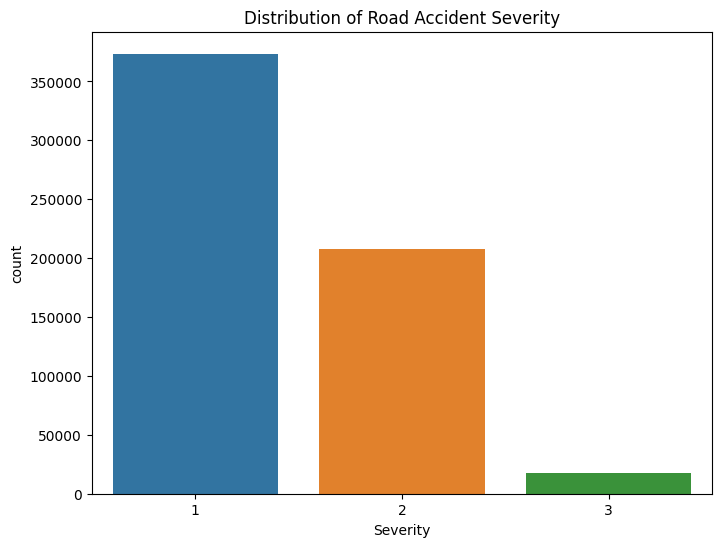

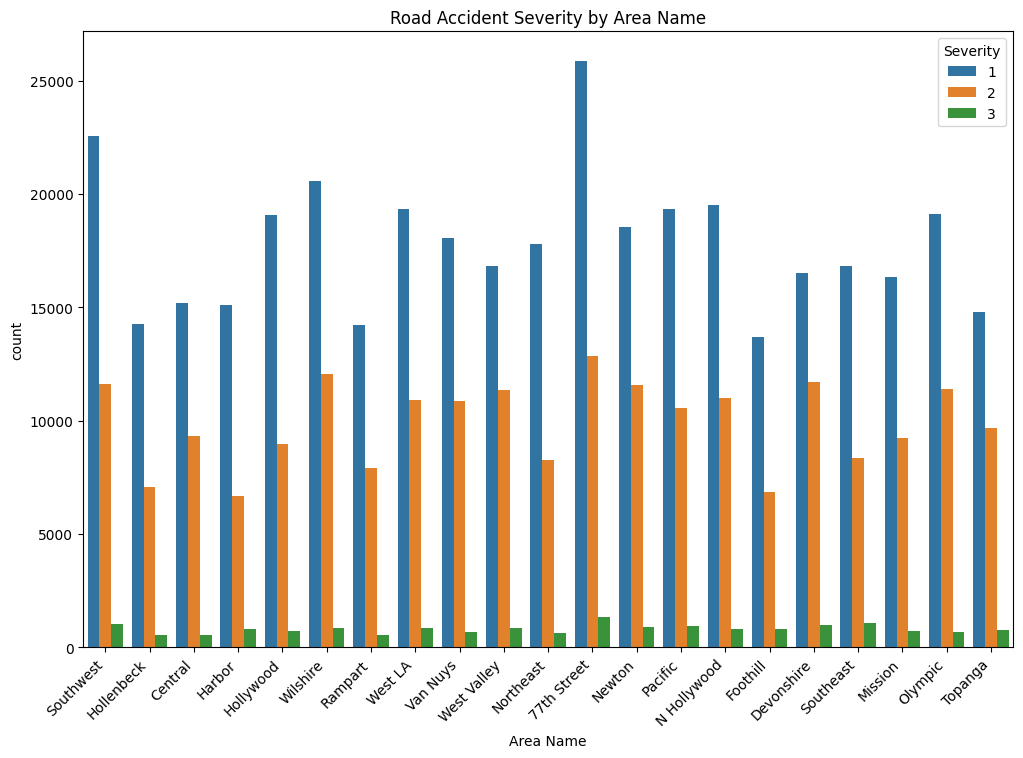

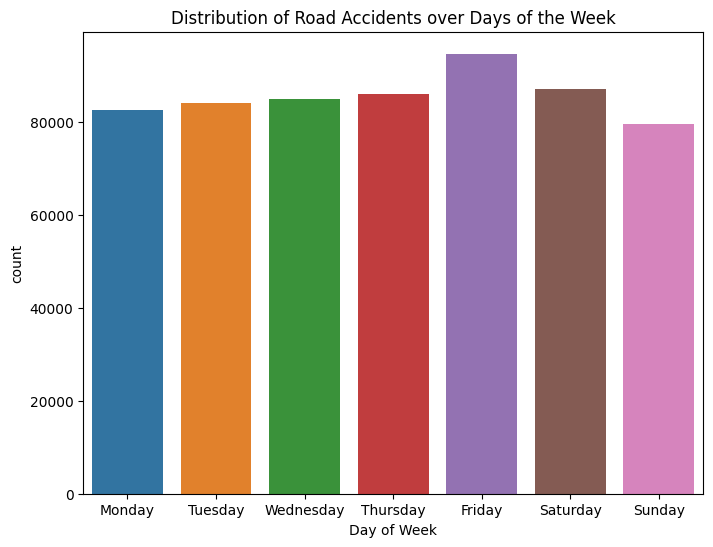

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df

# Distribution of the target variable (assuming "Severity" is your target)
plt.figure(figsize=(8, 6))
sns.countplot(x='Severity', data=df)
plt.title('Distribution of Road Accident Severity')
plt.show()

# Visualizing the relationship between categorical features and the target
plt.figure(figsize=(12, 8))
sns.countplot(x='Area Name', hue='Severity', data=df)
plt.title('Road Accident Severity by Area Name')
plt.xticks(rotation=45, ha='right')
plt.show()

# Exploring the distribution of accidents over days of the week
plt.figure(figsize=(8, 6))
sns.countplot(x='Day of Week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Road Accidents over Days of the Week')
plt.show()


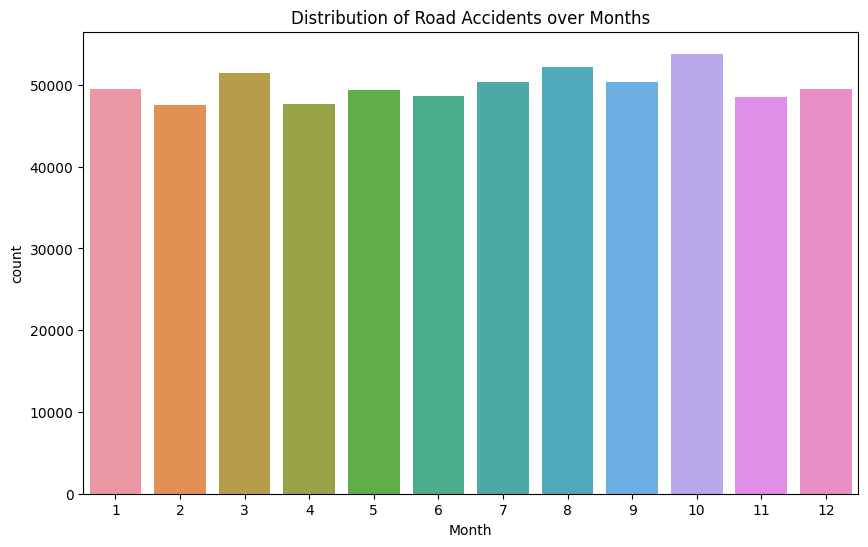

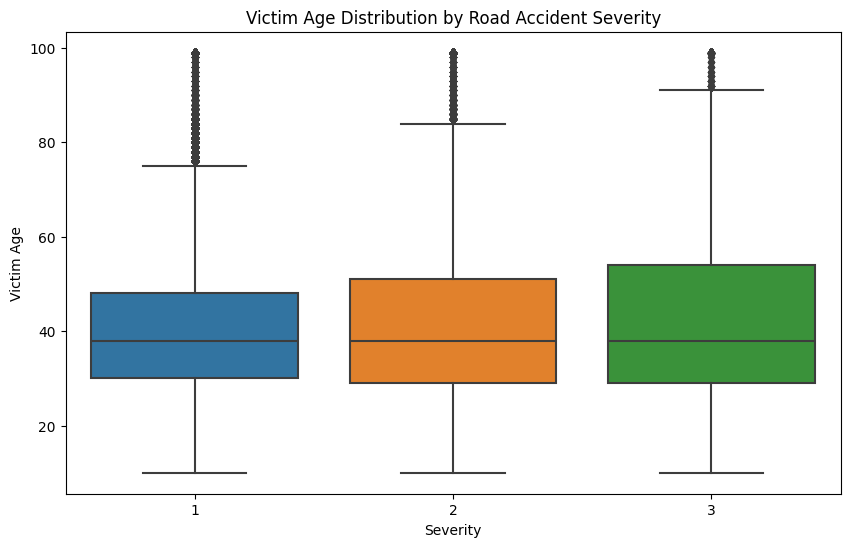

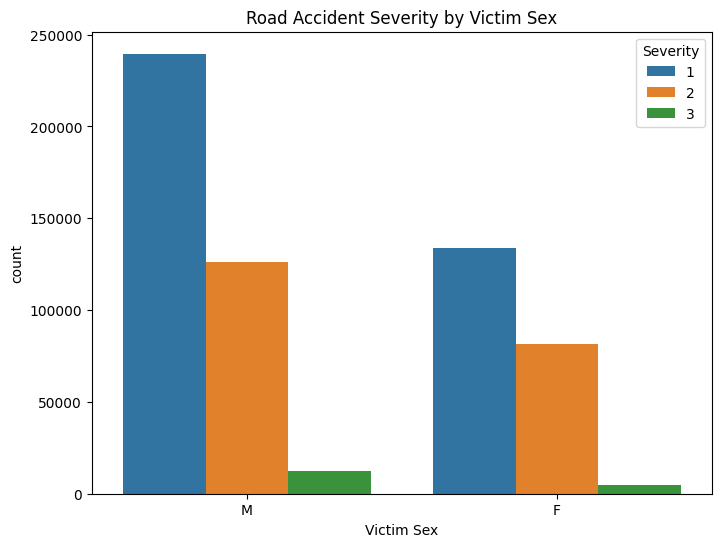

In [151]:
# Exploring the distribution of accidents over months
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, order=range(1, 13))
plt.title('Distribution of Road Accidents over Months')
plt.xlabel('Month')
plt.show()

# Box plot for Victim Age distribution by Severity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity', y='Victim Age', data=df)
plt.title('Victim Age Distribution by Road Accident Severity')
plt.show()

# Countplot for Victim Sex distribution by Severity
plt.figure(figsize=(8, 6))
sns.countplot(x='Victim Sex', hue='Severity', data=df)
plt.title('Road Accident Severity by Victim Sex')
plt.show()

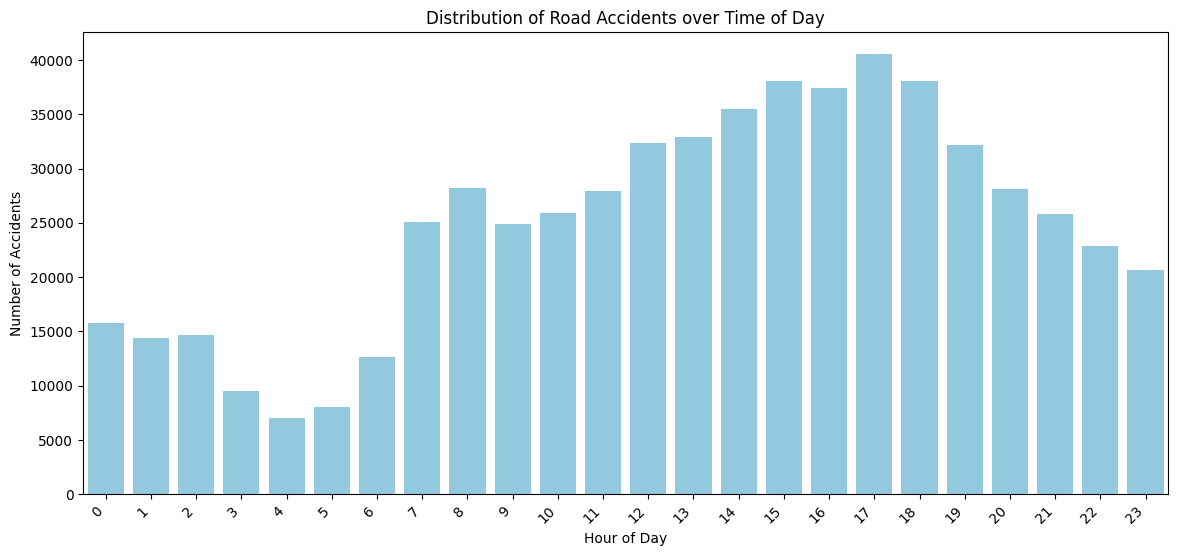

In [152]:
df['Hour'] = pd.to_datetime(df['Time Occurred'].astype(str)).dt.hour

# Plotting distribution of road accidents over time of day
plt.figure(figsize=(14, 6))
sns.countplot(x='Hour', data=df, color='skyblue')
plt.title('Distribution of Road Accidents over Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()

# **Time Trends:**

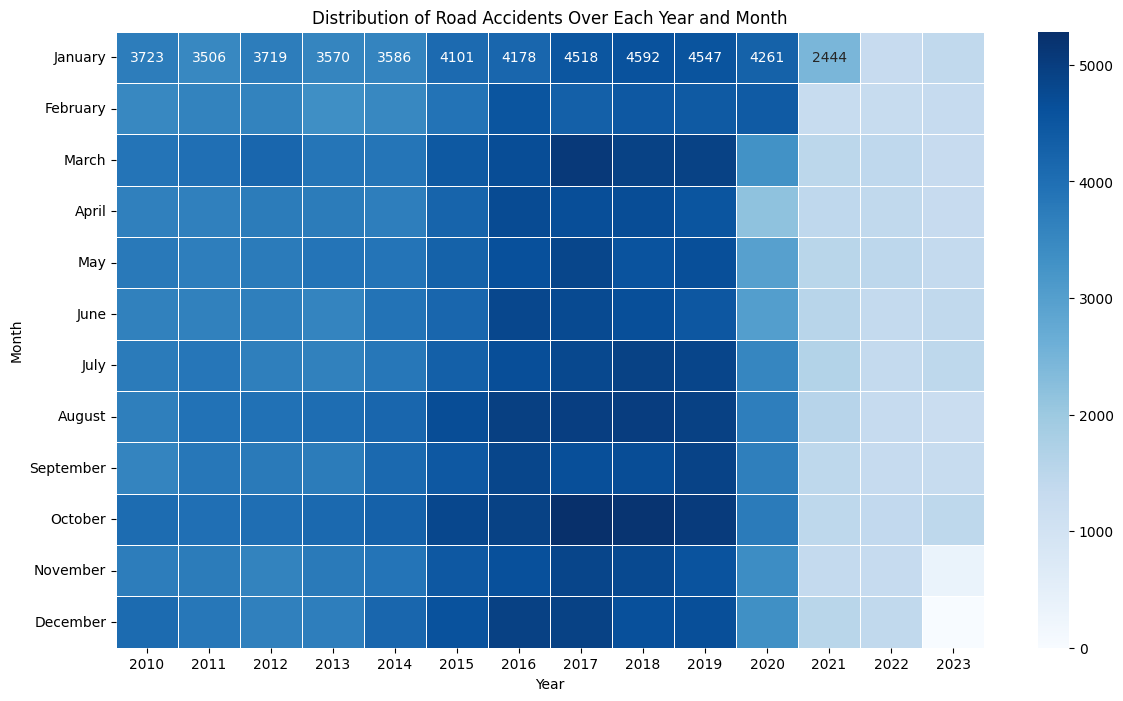

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Date Occurred' is already in datetime format
# Extract year and month from 'Date Occurred'
df['Year'] = df['Date Occurred'].dt.year
df['Month'] = df['Date Occurred'].dt.month_name()

# Create a pivot table for heatmap
heatmap_data = df.groupby(['Year', 'Month']).size().reset_index(name='Accident Count')
heatmap_data['Month'] = pd.Categorical(heatmap_data['Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)
heatmap_data = heatmap_data.pivot_table(index='Month', columns='Year', values='Accident Count', aggfunc='sum')

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d', linewidths=.5)
plt.title('Distribution of Road Accidents Over Each Year and Month')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


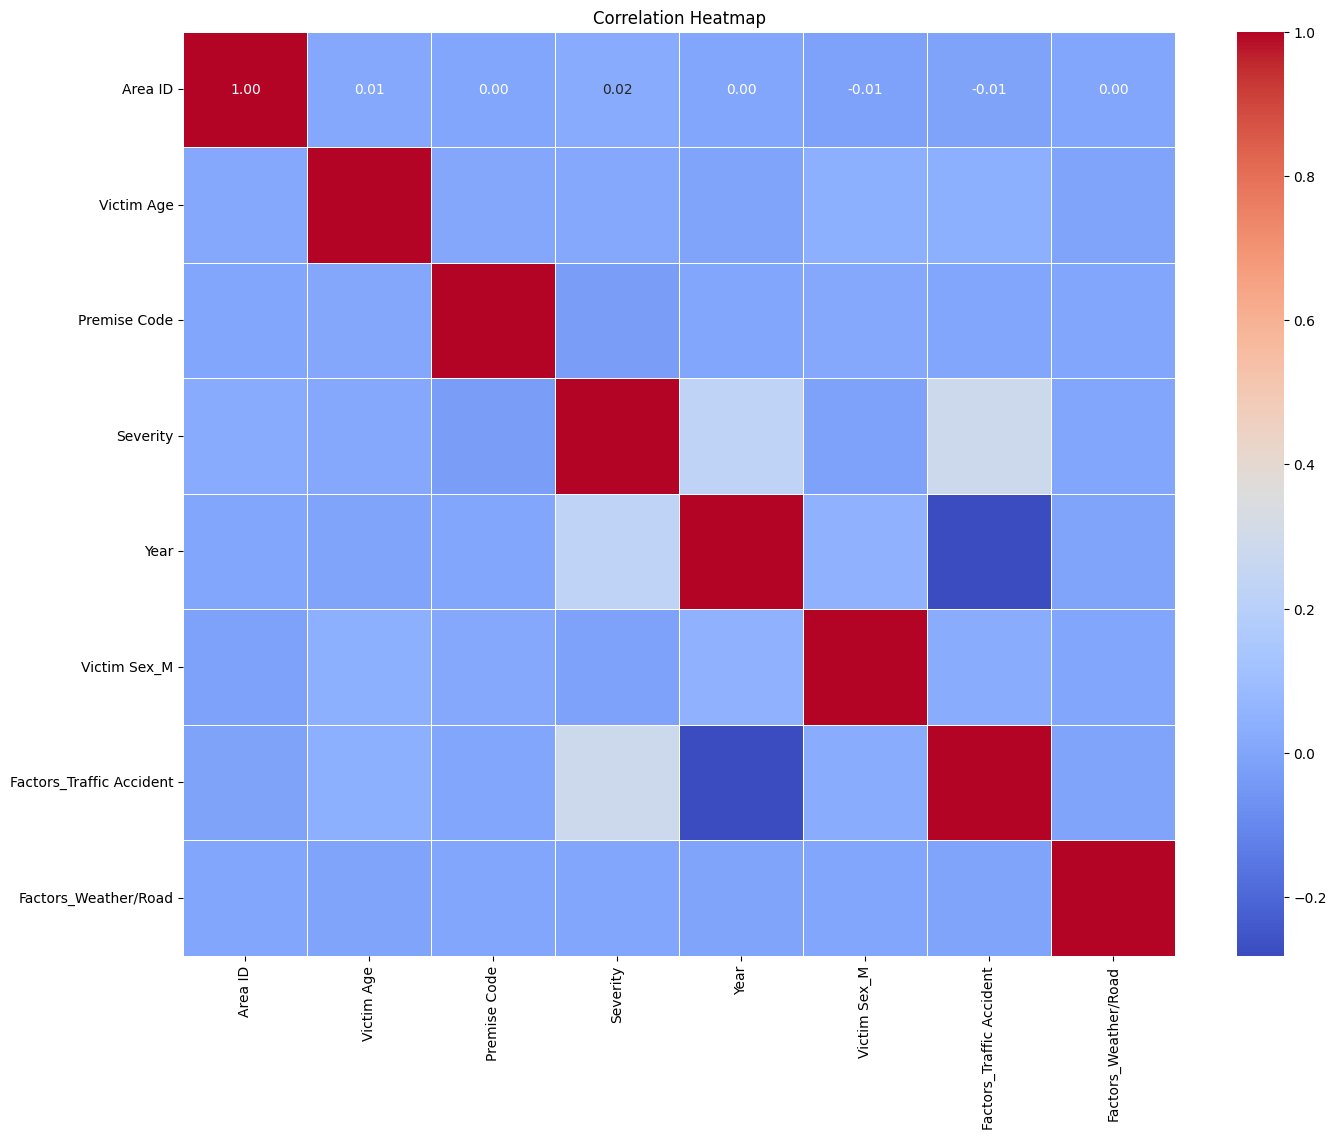

In [154]:
# Select columns for encoding
columns_for_encoding = ['Area ID', 'Victim Age', 'Victim Sex', 'Premise Code', 'Severity', 'Factors', 'Year']

# One-hot encode selected columns
df_encoded = pd.get_dummies(df[columns_for_encoding], 
                             columns=['Victim Sex', 'Factors'], 
                             drop_first=True)  # Use drop_first to avoid multicollinearity

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [155]:
df1 = df.copy()

In [156]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named df

# Define columns with numerical data
numerical_columns = ["Victim Age", "Latitude", "Longitude"]

# Function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.20)
    Q3 = df[column].quantile(0.80)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers for each numerical column
for column in numerical_columns:
    df = remove_outliers_iqr(df, column)

# Check the shape of the DataFrame after removing outliers
print("Shape after removing outliers:", df.shape)


Shape after removing outliers: (588143, 20)


In [157]:
df2 = df.copy()

In [158]:
df2.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Victim Age,Victim Sex,Premise Code,Premise Description,Address,Location,Severity,Factors,Latitude,Longitude,Day of Week,Month,Year,Hour
0,190319651,2019-08-24,2019-08-24,04:50:00,3,Southwest,22,M,101,STREET,JEFFERSON BL,"(34.0255, -118.3002)",2,Traffic Accident,34.0255,-118.3002,Saturday,August,2019,4
1,190319680,2019-08-30,2019-08-30,23:20:00,3,Southwest,30,F,101,STREET,JEFFERSON BL,"(34.0256, -118.3089)",1,Road Rage,34.0256,-118.3089,Friday,August,2019,23
2,190413769,2019-08-25,2019-08-25,05:45:00,4,Hollenbeck,38,M,101,STREET,N BROADWAY,"(34.0738, -118.2078)",1,Road Rage,34.0738,-118.2078,Sunday,August,2019,5
3,190127578,2019-11-20,2019-11-20,03:50:00,1,Central,21,M,101,STREET,1ST,"(34.0492, -118.2391)",1,Traffic Accident,34.0492,-118.2391,Wednesday,November,2019,3
4,190319695,2019-08-30,2019-08-30,21:00:00,3,Southwest,49,M,101,STREET,MARTIN LUTHER KING JR,"(34.0108, -118.3182)",2,Traffic Accident,34.0108,-118.3182,Friday,August,2019,21


In [159]:
# Set a threshold for minimum occurrences
min_occurrences_threshold = 10

# Count occurrences of each "Premise Description"
premise_counts = df['Premise Description'].value_counts()

# Get the list of premises to drop based on the threshold
premises_to_drop = premise_counts[premise_counts < min_occurrences_threshold].index

# Filter the DataFrame to keep only rows with premises above the threshold
df_filtered = df[~df['Premise Description'].isin(premises_to_drop)]

# Display the shape of the DataFrame before and after filtering
print("Shape before filtering:", df.shape)
print("Shape after filtering:", df_filtered.shape)


Shape before filtering: (588143, 20)
Shape after filtering: (587923, 20)


In [160]:
df['Address'].head()

0    JEFFERSON                    BL
1    JEFFERSON                    BL
2                        N  BROADWAY
3                                1ST
4              MARTIN LUTHER KING JR
Name: Address, dtype: string

In [161]:
import re

# Assuming your DataFrame is named df

# Clean up and format the "Address" column
df['Address'] = df['Address'].str.strip()  # Remove leading/trailing spaces
df['Address'] = df['Address'].str.title()  # Convert to title case
df['Address'] = df['Address'].str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with a single space
df['Address'] = df['Address'].str.replace(r'\b(Bl|Blvd|Street)\b', '', regex=True)  # Remove specific suffixes like 'Bl', 'Blvd', 'Street'

# Display the updated DataFrame
print(df['Address'].head())


0               Jefferson 
1               Jefferson 
2               N Broadway
3                      1St
4    Martin Luther King Jr
Name: Address, dtype: string


In [162]:
df2.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Victim Age,Victim Sex,Premise Code,Premise Description,Address,Location,Severity,Factors,Latitude,Longitude,Day of Week,Month,Year,Hour
0,190319651,2019-08-24,2019-08-24,04:50:00,3,Southwest,22,M,101,STREET,JEFFERSON BL,"(34.0255, -118.3002)",2,Traffic Accident,34.0255,-118.3002,Saturday,August,2019,4
1,190319680,2019-08-30,2019-08-30,23:20:00,3,Southwest,30,F,101,STREET,JEFFERSON BL,"(34.0256, -118.3089)",1,Road Rage,34.0256,-118.3089,Friday,August,2019,23
2,190413769,2019-08-25,2019-08-25,05:45:00,4,Hollenbeck,38,M,101,STREET,N BROADWAY,"(34.0738, -118.2078)",1,Road Rage,34.0738,-118.2078,Sunday,August,2019,5
3,190127578,2019-11-20,2019-11-20,03:50:00,1,Central,21,M,101,STREET,1ST,"(34.0492, -118.2391)",1,Traffic Accident,34.0492,-118.2391,Wednesday,November,2019,3
4,190319695,2019-08-30,2019-08-30,21:00:00,3,Southwest,49,M,101,STREET,MARTIN LUTHER KING JR,"(34.0108, -118.3182)",2,Traffic Accident,34.0108,-118.3182,Friday,August,2019,21


In [163]:
import numpy as np

# Replace values with counts less than 500 with NaN
outlier_values = df2['Premise Code'].value_counts() < 4000
outliers = outlier_values[outlier_values].index
df2['Premise Code'] = np.where(df2['Premise Code'].isin(outliers), np.nan, df2['Premise Code'])


In [164]:
df2.isnull().sum()

DR Number                 0
Date Reported             0
Date Occurred             0
Time Occurred             0
Area ID                   0
Area Name                 0
Victim Age                0
Victim Sex                0
Premise Code           8594
Premise Description       0
Address                   0
Location                  0
Severity                  0
Factors                   0
Latitude                  0
Longitude                 0
Day of Week               0
Month                     0
Year                      0
Hour                      0
dtype: int64

In [165]:
df2['Premise Code'].fillna(value=102, inplace=True)

In [166]:
df2['Premise Code'].value_counts() 

Premise Code
101    561330
108     18219
102      8594
Name: count, dtype: int64

In [167]:
df2.drop(columns=['Date Occurred','Time Occurred', 'Area Name','Premise Description','Address', 'Location', 'DR Number', 'Date Reported'], inplace=True)

In [168]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588143 entries, 0 to 599779
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Area ID       588143 non-null  Int64  
 1   Victim Age    588143 non-null  Int64  
 2   Victim Sex    588143 non-null  string 
 3   Premise Code  588143 non-null  int64  
 4   Severity      588143 non-null  Int64  
 5   Factors       588143 non-null  string 
 6   Latitude      588143 non-null  Float64
 7   Longitude     588143 non-null  Float64
 8   Day of Week   588143 non-null  string 
 9   Month         588143 non-null  object 
 10  Year          588143 non-null  int32  
 11  Hour          588143 non-null  int32  
dtypes: Float64(2), Int64(3), int32(2), int64(1), object(1), string(3)
memory usage: 56.7+ MB


In [169]:
df2.head()

,Area ID,Victim Age,Victim Sex,Premise Code,Severity,Factors,Latitude,Longitude,Day of Week,Month,Year,Hour
0,3,22,M,101,2,Traffic Accident,34.0255,-118.3002,Saturday,August,2019,4
1,3,30,F,101,1,Road Rage,34.0256,-118.3089,Friday,August,2019,23
2,4,38,M,101,1,Road Rage,34.0738,-118.2078,Sunday,August,2019,5
3,1,21,M,101,1,Traffic Accident,34.0492,-118.2391,Wednesday,November,2019,3
4,3,49,M,101,2,Traffic Accident,34.0108,-118.3182,Friday,August,2019,21


In [170]:
print(type(df['Time Occurred'][0]))

<class 'datetime.time'>


In [171]:
df2['Year'] = df2['Year'].astype('Int64')
df2['Hour'] = df2['Hour'].astype('Int64')
df2['Month'] = df2['Month'].astype('string')

In [172]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588143 entries, 0 to 599779
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Area ID       588143 non-null  Int64  
 1   Victim Age    588143 non-null  Int64  
 2   Victim Sex    588143 non-null  string 
 3   Premise Code  588143 non-null  int64  
 4   Severity      588143 non-null  Int64  
 5   Factors       588143 non-null  string 
 6   Latitude      588143 non-null  Float64
 7   Longitude     588143 non-null  Float64
 8   Day of Week   588143 non-null  string 
 9   Month         588143 non-null  string 
 10  Year          588143 non-null  Int64  
 11  Hour          588143 non-null  Int64  
dtypes: Float64(2), Int64(5), int64(1), string(4)
memory usage: 78.4 MB


In [173]:
df2.to_csv('Los_Angeles_Model.csv', index=False)

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Select features and target variable
X = df2.drop(columns=['Severity'])
y = df2['Severity']

# One-hot encode categorical variables
categorical_columns = ['Victim Sex', 'Factors', 'Day of Week', 'Month']
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Min-Max scaling for numerical variables
numerical_columns = ['Victim Age', 'Latitude', 'Longitude', 'Hour']
scaler = MinMaxScaler()
X_encoded[numerical_columns] = scaler.fit_transform(X_encoded[numerical_columns])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Now, you can proceed with model selection, training, and evaluation


In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report_result)


Accuracy: 0.7764

Classification Report:
              precision    recall  f1-score   support

         1.0       0.82      0.86      0.84     72835
         2.0       0.70      0.70      0.70     41395
         3.0       0.37      0.02      0.04      3399

    accuracy                           0.78    117629
   macro avg       0.63      0.52      0.52    117629
weighted avg       0.76      0.78      0.77    117629



brief interpretation of the results:

Precision: The proportion of true positive predictions among all positive predictions. For example, for class 1.0, 82% of the predicted instances were correctly classified as class 1.0.

Recall: The proportion of true positive predictions among all actual positive instances. For class 1.0, 86% of the actual instances were correctly classified as class 1.0.

F1-score: The harmonic mean of precision and recall. It provides a balance between precision and recall. It's often used when there is an uneven class distribution.

Support: The number of actual instances in each class.

Macro Avg and Weighted Avg: These are averages of the precision, recall, and F1-score across all classes. Macro Avg treats all classes equally, while Weighted Avg takes into account the class imbalance.